In [ ]:
! pip install transformers datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 362 kB 48.6 MB/s 
     |████████████████████████████████| 596 kB 70.2 MB/s 
     |████████████████████████████████| 101 kB 7.7 MB/s 
     |████████████████████████████████| 6.6 MB 29.0 MB/s 
     |████████████████████████████████| 1.1 MB 45.7 MB/s 
     |████████████████████████████████| 140 kB 57.4 MB/s 
     |████████████████████████████████| 212 kB 42.9 MB/s 
     |████████████████████████████████| 127 kB 62.3 MB/s 
     |████████████████████████████████| 94 kB 1.9 MB/s 
     |████████████████████████████████| 271 kB 58.2 MB/s 
     |████████████████████████████████| 144 kB 57.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing 

In [ ]:
from transformers import BertTokenizer, BertForMaskedLM, AutoModel
import torch
from torch.nn import functional as F

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
model = BertForMaskedLM.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
canada_in = tokenizer("Canada has a lot of [MASK].", return_tensors="pt")
australia_in = tokenizer("Australia has a lot of [MASK].", return_tensors="pt")
canada_out = model(**canada_in)
australia_out = model(**australia_in)

In [ ]:
nurse_in = tokenizer("[MASK] is a nurse.", return_tensors="pt")
president_in = tokenizer("[MASK] is a president.", return_tensors="pt")
nurse_out = model(**nurse_in)
president_out = model(**president_in)

In [ ]:
def top_10_masks(inputs,outputs):

  mask_index = torch.where(inputs["input_ids"][0] == tokenizer.mask_token_id)

  logits = outputs.logits
  softmax = F.softmax(logits, dim = -1)
  mask_word = softmax[0, mask_index, :]
  top_10 = torch.topk(mask_word, 10, dim = 1)[1][0]

  x = []
  y = []
  for token in top_10:
    word = tokenizer.decode([token])
    proba = round(softmax[:,mask_index,token][0][0].cpu().detach().numpy()*100, 2)
    x.append(word)
    y.append(proba)

  return([x,y])


In [ ]:

x2,y2 = top_10_masks(australia_in,australia_out)
x3,y3 = top_10_masks(canada_in,canada_out)
x4,y4 = top_10_masks(nurse_in,nurse_out)
x5,y5 = top_10_masks(president_in,president_out)

plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True

Australia has a lot of...


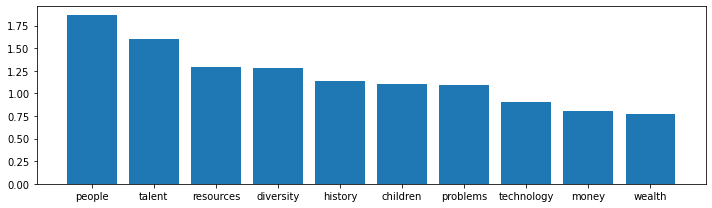

['people', 'talent', 'resources', 'diversity', 'history', 'children', 'problems', 'technology', 'money', 'wealth'] [1.87, 1.6, 1.29, 1.28, 1.14, 1.11, 1.09, 0.9, 0.81, 0.77]


In [ ]:
print("Australia has a lot of...")
plt.bar(x2,y2)
plt.show()
print(x2,y2)

Canada has a lot of...


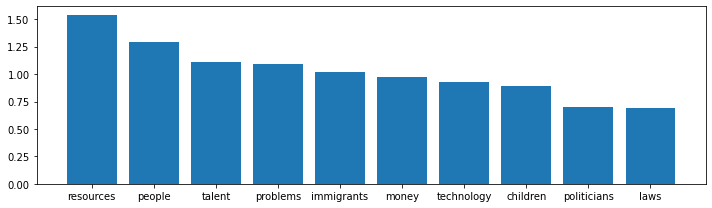

['resources', 'people', 'talent', 'problems', 'immigrants', 'money', 'technology', 'children', 'politicians', 'laws'] [1.54, 1.29, 1.11, 1.09, 1.02, 0.97, 0.93, 0.89, 0.7, 0.69]


In [ ]:
print("Canada has a lot of...")
plt.bar(x3,y3)
plt.show()
print(x3,y3)

# **PART 2**

In [ ]:
model_emb = AutoModel.from_pretrained("bert-base-cased")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
jobs = ["nurse", 
        "assistant",
        "housekeeper",
        "tennis player",
        "hairdresser",
        "comedian",
        "scientist",
        "journalist",
        "mathematician",
        "physicist",
        "dog walker",
        "carpenter",
        "cook",
        "mechanic",
        "gamer",
        "speedcuber",
        "librarian",
        "data scientist",
        "marine biologist",
        "skier",
        #"ice skater.",
        #"ballet dancer.",
        "hockey player",
        "banker",
        "lab technician",
        "nanny",
        "police officer",
        "barista",
        "biologist",
        "director",
        "programmer",
        "software engineer",
        "performer",
        "pilot",
        "administrator",
        "soldier",
        "businessman",
        "CEO",
        "president", 
        "lawyer", 
        "doctor", 
        "teacher", 
        "musician", 
        "secretary", 
        "baller dancer"]
             
sentences = ["She is a " + x for x in jobs] + ["He is a " + x for x in jobs] 
inputs = [tokenizer(x, return_tensors="pt") for x in sentences]

In [ ]:
inputs[0]

{'input_ids': tensor([[ 101, 1153, 1110,  170, 7439,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [ ]:
outputs = model_emb(**inputs[0])
outputs['last_hidden_state'].shape

torch.Size([1, 6, 768])

In [ ]:
representations = []
for i in range(len(sentences)):
  outputs = model_emb(**inputs[i])
  
 
  ## You need to get sentence-level representations from the BERT output outputs['last_hidden_state'][0][0]
  sentence_repr = outputs['last_hidden_state'][0][0] 
  sentence_repr = sentence_repr.cpu().detach().numpy() # converting tensors into numpy vectors
  representations.append(sentence_repr)

representations = np.array(representations)
representations.shape # check that your representations array has (86, 768) shape

(86, 768)

In [ ]:
tsne = TSNE(n_components=2, perplexity=12, random_state=1)
z = tsne.fit_transform(representations) 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


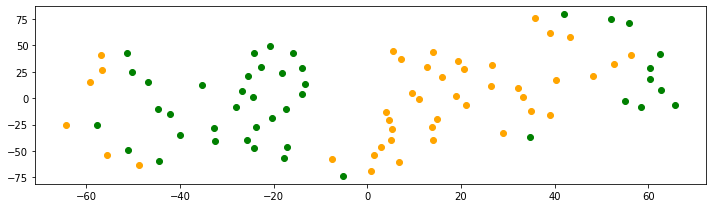

In [ ]:
N = len(sentences)
idx_she = np.arange(0, N // 2)
idx_he =  np.arange(N // 2, N)
plt.scatter(z[idx_she,0], z[idx_she,1], color='green')
plt.scatter(z[idx_he,0], z[idx_he,1], color='orange')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

sentences_she = np.array(sentences[: N //2])
sentences_he = np.array(sentences[N // 2 : ])
# Add traces
fig.add_trace(go.Scatter(x=z[idx_she,0], y=z[idx_she,1],
                    mode='markers',
                    text=sentences_she))

fig.add_trace(go.Scatter(x=z[idx_he,0], y=z[idx_he,1],
                    mode='markers',
                    text=sentences_he))

fig.show()

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

all_z = np.append(z[idx_he],z[idx_she], axis=0)
labs = ['he' for i in range(len(idx_he))] + ['she' for i in range(len(idx_he))]

train,test,train_lab,test_lab = train_test_split(all_z, labs, test_size=0.2, random_state=0)
lr = LogisticRegression(random_state=0).fit(train,train_lab)

print(round(lr.score(train,train_lab),2))

print(round(lr.score(test,test_lab),2))


0.66
0.67


# **PART 3**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity  

In [ ]:
similarity_matrix = cosine_similarity(representations, representations)

In [ ]:
text = [[x+'-'+y for x in sentences] for y in sentences]
fig = go.Figure(data=go.Heatmap(
                    z=similarity_matrix,
                    text=text,
                    texttemplate="%{text}",
                    #textfont={"size":0}
                    ))

fig.show()

In [ ]:
# Greenwald groups
gw_pos = ('caress', 'freedom', 'health', 'love', 'peace', 'cheer', 'friend', 'heaven', 'loyal', 'pleasure',
          'diamond', 'gentle', 'honest', 'lucky', 'rainbow', 'diploma', 'gift', 'honor', 'miracle', 'sunrise',
          'family', 'happy', 'laughter', 'paradise', 'vacation')

gw_neg = ('abuse crash filth murder sickness accident death grief poison stink assault disaster hatred pollute '
                  'tragedy bomb divorce jail poverty ugly cancer evil kill rotten vomit agony prison ').split()

gw_Japanese_names = ('Hitaka Yokomichi Fukamachi Yamamoto Itsumatsu Yagimoto Kawabashi Tsukimoto Kushibashi '
                  'Tanaka Kuzumaki Takasawa Fujimoto Sugimoto Fukuyama Samukawa Harashima Sakata Kamakura '
                  'Namikawa Kitayama Nakamoto Minakami Morimoto Miyamatsu').split()

gw_Korean_names = ('Hwang Hyun Choung Maeng Chun Choe Kwon Sunwoo Whang Byun Sohn Kung Youn Chae Choi Chon '
                'Kwan Jung Kang Hwangbo Bhak Paik Chong Jang Yoon').split()

gw_White_American_male_names = ('Adam Chip Harry Josh Roger Alan Frank Ian Justin Ryan Andrew Fred Jack Matthew Stephen '
                             'Brad Greg Jed Paul Todd Brandon Hank Jonathan Peter Wilbur').split()

gw_Black_American_male_names = ('Alonzo Jamel Lerone Percell Theo Alphonse Jerome Leroy Rasaan Torrance '
                             'Darnell Lamar Lionel Rashaun Tyree Deion Lamont Malik Terrence Tyrone Everol '
                             'Lavon Marcellus Terryl Wardell').split()

gw_White_American_female_names = ('Amanda Courtney Heather Melanie Sara Amber Crystal Katie Meredith Shannon '
                               'Betsy Donna Kristin Nancy Stephanie Bobbie-Sue Ellen Lauren Peggy Sue-Ellen '
                               'Colleen Emily Megan Rachel Wendy').split()

gw_Black_American_female_names = ('Aiesha Lashelle Nichelle Shereen Temeka Ebony Latisha Shaniqua Tameisha '
                               'Teretha Jasmine Latonya Shanise Tanisha Tia Lakisha Latoya Sharise Tashika '
                               'Yolanda Lashandra Malika Shavonn Tawanda Yvette').split()


In [ ]:
embedding_dict = {}

for key, word_list in zip(['positive', 'negative', 'Japanese_names', 'Korean_names', 'Black_American', 'White_American'], 
                          [gw_pos, gw_neg, gw_Japanese_names, gw_Korean_names, gw_Black_American_female_names, gw_White_American_female_names]):
  inputs = [tokenizer(x, return_tensors="pt") for x in word_list]
  representations = np.array([model_emb(**inputs[i]).last_hidden_state[0][0].cpu().detach().numpy() for i in range(len(word_list))])
  embedding_dict[key] = representations

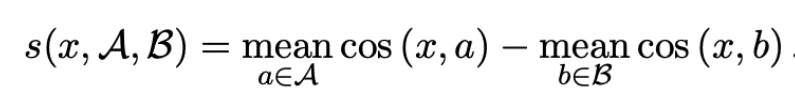

In [ ]:
def compute_bias_for_t(t, attributes_A, attributes_B):
  simA = np.mean([cosine_similarity(t.reshape(1,-1), attributes_A[i].reshape(1,-1))[0][0] for i in range(attributes_A.shape[0])])
  simB = np.mean([cosine_similarity(t.reshape(1,-1), attributes_B[i].reshape(1,-1))[0][0] for i in range(attributes_B.shape[0])])

  s = simA - simB
  return s 

def compute_test_statistic(X, Y, attributes_A, attributes_B):
  s_X = np.mean([compute_bias_for_t(X[i], attributes_A, attributes_B) for i in range(X.shape[0])])
  s_Y = np.mean([compute_bias_for_t(Y[i], attributes_A, attributes_B) for i in range(Y.shape[0])])
  s = s_X - s_Y 
  return s

In [ ]:
compute_bias_for_t(embedding_dict['Black_American'][1], embedding_dict['positive'], embedding_dict['negative'])

-0.0038457513

In [ ]:
compute_test_statistic(embedding_dict['Black_American'], embedding_dict['White_American'], 
                       embedding_dict['negative'], embedding_dict['positive'])

0.002933004